In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
data= pd.read_csv('train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
data= np.array(data)
m,n= data.shape

np.random.shuffle(data)

# testing data
data_test= data[0:1000].T
Y_test= data_test[0]
X_test= data_test[1:n]
X_test=X_test/255

# training data
data_train= data[1000:m].T
X_train= data_train[1:n]
Y_train= data_train[0]
X_train= X_train/255

In [94]:
def init_para():
    w1= np.random.rand(10, 784)-0.5
    b1=np.random.rand(10,1)-0.5
    w2= np.random.rand(10, 10)-0.5
    b2=np.random.rand(10,1)-0.5
    return w1, w2, b1, b2
    

In [75]:
def relu(z):
    return np.maximum(0, z)
def der_relu(z):
    return z>0

In [96]:
def softmax(z):
    s= np.exp(z)/sum(np.exp(z))
    return s

In [77]:
def forward_prop(w1, w2, b1, b2, x):
    z= w1.dot(x)+b1
    a1= relu(z)
    z1= w2.dot(a1)+b2
    a2= softmax(z1)
    
    return a1, a2, z, z1 

In [78]:
def one_hot(y):
    onehot_y= np.zeros((y.size, y.max()+1))
    onehot_y[np.arange(y.size), y]=1
    return onehot_y.T

In [89]:
def back_prop(a1,a2, z, z1, w2, X, y):
    Y= one_hot(y)
    dz2= a2-Y
    dw2= dz2.dot(a1.T)/ m
    db2= 1/m*np.sum(dz2, 1)
    dz1= (w2.T).dot(dz2) * der_relu(z)
    dw1= dz1.dot(X.T)/ m
    db1= 1/m*np.sum(dz1, 1)
    return dw1, dw2, db1, db2

In [91]:
def update_para(w1, w2, b1, b2, dw1, dw2, db1, db2, alpha):
    w1= w1 - alpha*dw1
    w2= w2 - alpha*dw2
    b1= b1 - alpha*np.reshape(db1, (10,1))
    b2= b2 - alpha*np.reshape(db2, (10,1))
    return w1, w2, b1, b2
    

In [81]:
def get_prediction(A2):
    return np.argmax(A2, 0)

def get_accuracy(prediction, Y):
    print(prediction, Y)
    return np.sum(prediction==Y)/ Y.size

In [92]:
def gradient_decent(X, Y, iteration,alpha ):
    w1, w2, b1, b2= init_para()
    for i in range(iteration):
        A1, A2, Z1, Z2= forward_prop(w1, w2, b1, b2, X)
        dw1, dw2, db1, db2 = back_prop(A1, A2, Z1, Z2, w2, X, Y)
        w1, w2, b1, b2= update_para(w1, w2, b1, b2, dw1, dw2, db1, db2, alpha)
        if i%10==0:
            print("iteration:", i)
            print("Accuracy is:", get_accuracy(get_prediction(A2), Y))
    return w1, b1, w2, b2

In [101]:
w1, b1, w2, b2=gradient_decent(X_train, Y_train, 500, 1)


iteration: 0
[7 1 1 ... 1 9 2] [9 8 7 ... 4 6 6]
Accuracy is: 0.059536585365853656
iteration: 10
[7 8 7 ... 4 6 0] [9 8 7 ... 4 6 6]
Accuracy is: 0.531609756097561
iteration: 20
[9 8 7 ... 9 2 2] [9 8 7 ... 4 6 6]
Accuracy is: 0.6050243902439024
iteration: 30
[9 8 7 ... 9 6 6] [9 8 7 ... 4 6 6]
Accuracy is: 0.676219512195122
iteration: 40
[9 8 7 ... 9 6 6] [9 8 7 ... 4 6 6]
Accuracy is: 0.744390243902439
iteration: 50
[9 8 7 ... 9 6 6] [9 8 7 ... 4 6 6]
Accuracy is: 0.7743414634146342
iteration: 60
[9 8 7 ... 9 6 6] [9 8 7 ... 4 6 6]
Accuracy is: 0.8103170731707318
iteration: 70
[9 8 7 ... 4 6 6] [9 8 7 ... 4 6 6]
Accuracy is: 0.8050243902439025
iteration: 80
[9 8 7 ... 4 6 6] [9 8 7 ... 4 6 6]
Accuracy is: 0.8353170731707317
iteration: 90
[9 8 7 ... 9 6 6] [9 8 7 ... 4 6 6]
Accuracy is: 0.8357317073170731
iteration: 100
[9 8 7 ... 9 6 6] [9 8 7 ... 4 6 6]
Accuracy is: 0.8351951219512195
iteration: 110
[9 8 7 ... 9 6 6] [9 8 7 ... 4 6 6]
Accuracy is: 0.8566341463414634
iteration: 120
[

In [104]:
def make_prediction(X, W1, b1, W2, b2):
    _, A2, _,_=forward_prop(W1, W2, b1, b2, X)
    return get_prediction(A2)

def test_prediction(index, w1, b1, w2, b2):
    current_image= X_train[:, index, None]
    prediction= make_prediction(X_train[:, index, None], w1, b1, w2, b2)
    label= Y_train[index]
    
    print("Prediction:", prediction)
    print("Label:", label)
    
    current_image= current_image.reshape((28,28))*255
    plt.gray() 
    plt.imshow(current_image, interpolation="nearest")
    plt.show

Prediction: [3]
Label: 3


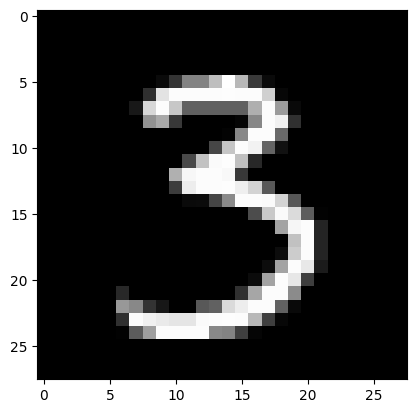

In [109]:
test_prediction(69, w1, b1, w2, b2)

In [1]:
x = [1, 2, 3, 4]
x[:3] = [0, 20]
print(x)

[0, 20, 4]


In [ ]:
rsult= 7//3